In [150]:
import cv2

In [151]:
import mediapipe as mp

In [152]:
image=cv2.imread('/content/original_image_1.jpg')
H,W,_=image.shape

In [153]:
from google.colab.patches import cv2_imshow

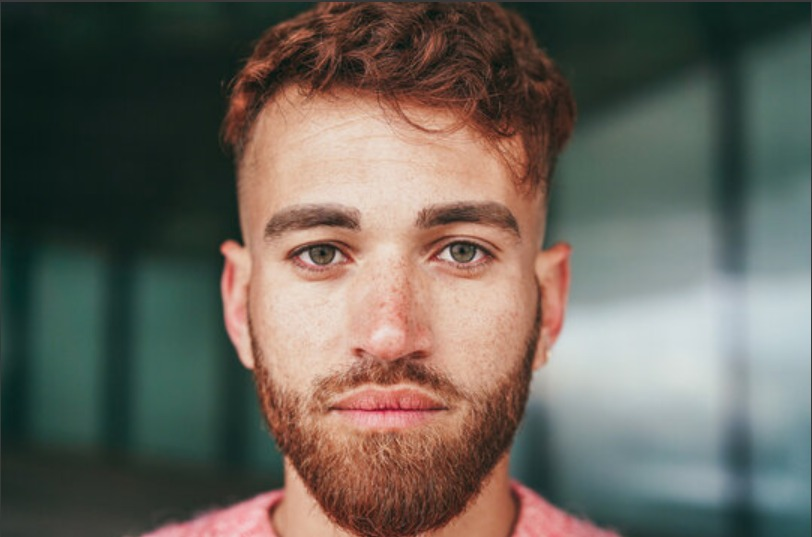

In [154]:
cv2_imshow(image)

In [155]:
#class for face detction
mp_face_detection=mp.solutions.face_detection

In [156]:
#creating an object for detecting faces up close
face_detection_close=mp_face_detection.FaceDetection(model_selection=0,min_detection_confidence=0.5)

In [157]:
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
out=face_detection_close.process(image_rgb)
print(out.detections)

# (xmin,ymin)=top left corner(relative)
# (width,height)=box size(relative)
# elements in this list are mediapipe.framework.formats.detection_pb2.Detection protobuf message produced by the FaceDetection model.

[label_id: 0
score: 0.952635825
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.286627561
    ymin: 0.319247127
    width: 0.398022383
    height: 0.601770401
  }
  relative_keypoints {
    x: 0.400038689
    y: 0.483973384
  }
  relative_keypoints {
    x: 0.566034913
    y: 0.469165087
  }
  relative_keypoints {
    x: 0.488598108
    y: 0.62086767
  }
  relative_keypoints {
    x: 0.492419899
    y: 0.748412251
  }
  relative_keypoints {
    x: 0.310208589
    y: 0.554423869
  }
  relative_keypoints {
    x: 0.656811833
    y: 0.526187181
  }
}
]


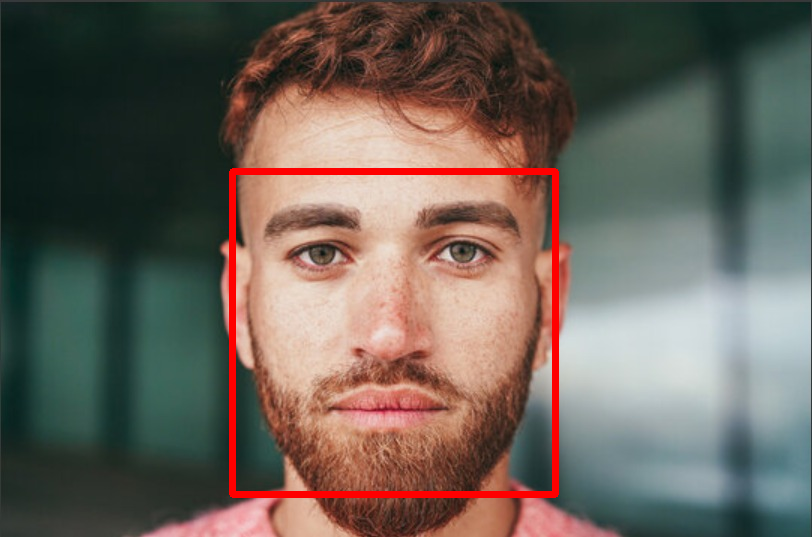

In [158]:
#drawing the bbox
if out.detections is not None:
    detection=out.detections[0]
    location_data=detection.location_data
    bbox=location_data.relative_bounding_box

    x1,y1,w,h=bbox.xmin , bbox.ymin , bbox.width , bbox.height

    #this is an relative bbox
    x1=int(x1*W)
    y1=int(y1*H)
    w=int(w*W)
    h=int(h*H)

    image=cv2.rectangle(image,(x1,y1),(x1+w,y1+h),(0,0,255),5)

    cv2_imshow(image)


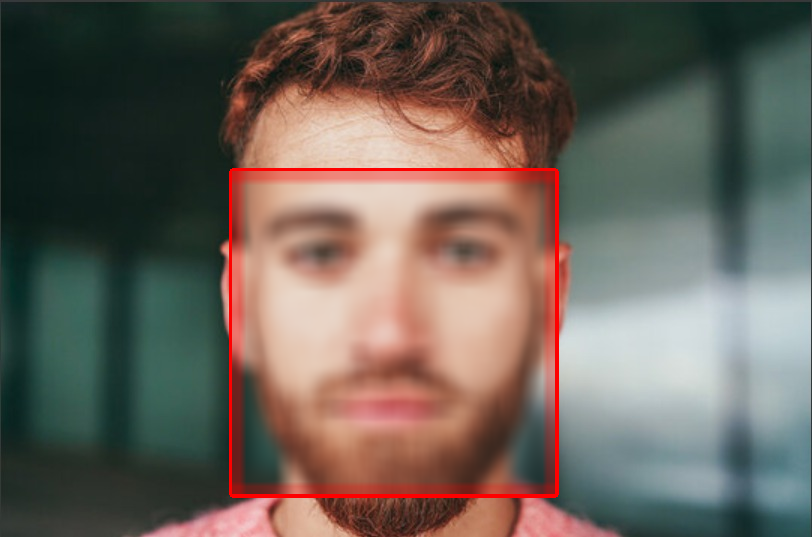

In [159]:
image[y1:y1+h,x1:x1+w,:]=cv2.blur(image[y1:y1+h,x1:x1+w,:],(20,20))
cv2_imshow(image)

In [160]:
#creating an object for detecting faces up close
face_detection_far=mp_face_detection.FaceDetection(model_selection=1,min_detection_confidence=0.7)

In [161]:
image2=cv2.imread('/content/humans2.jpg')
H,W,_=image2.shape

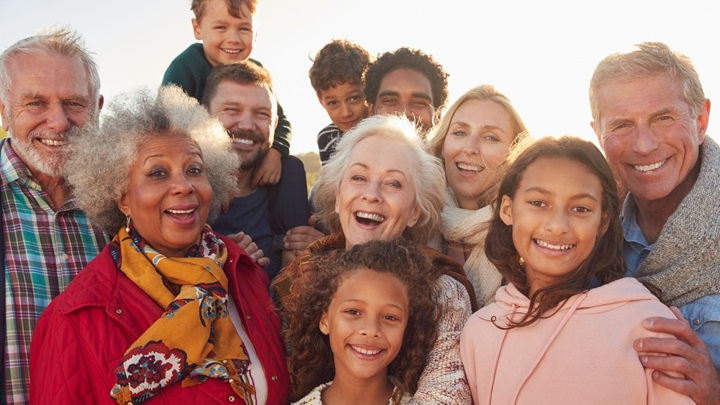

In [162]:
cv2_imshow(image2)

In [163]:
image2_rgb=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
out=face_detection_far.process(image2_rgb)
print(len(out.detections))

9


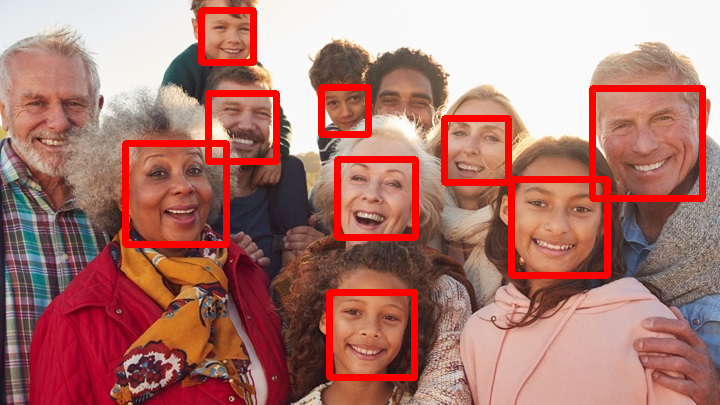

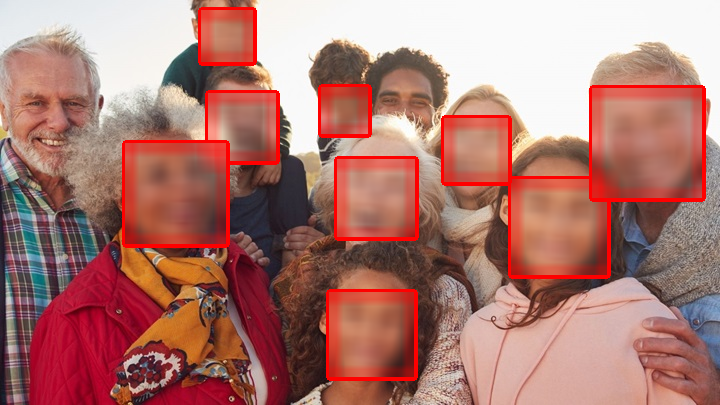

In [164]:
image3=image2.copy()
for i in range(len(out.detections)):
  if out.detections is not None:
    detection=out.detections[i]
    location_data=detection.location_data
    bbox=location_data.relative_bounding_box

    x1,y1,w,h=bbox.xmin , bbox.ymin , bbox.width , bbox.height

    #this is an relative bbox
    x1=int(x1*W)
    y1=int(y1*H)
    w=int(w*W)
    h=int(h*H)

    image2=cv2.rectangle(image2,(x1,y1),(x1+w,y1+h),(0,0,255),5)
    image3=cv2.rectangle(image3,(x1,y1),(x1+w,y1+h),(0,0,255),5)

    image3[y1:y1+h,x1:x1+w,:]=cv2.blur(image3[y1:y1+h,x1:x1+w,:],(20,20))

cv2_imshow(image2)
cv2_imshow(image3)


In [165]:
cv2.imwrite('mulitplefaces.jpg',image3)

True